<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Diagramas de área, histogramas y gráficos de barras </font></h1>

## Introducción

En esta actividad de laboratorio, seguiremos explorando la biblioteca de Matplotlib y aprenderá a crear diagramas adicionales: diagramas de área, histogramas y gráficos de barras.

## Índice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Explorando los conjuntos de datos con *pandas*](#0)<br>
2. [Descargar y preparar los datos](#2)<br>
3. [Visualizar los datos mediante Matplotlib](#4) <br>
4. [Diagrama de área](#6) <br>
5. [Histogramas](#8) <br>
6. [Gráficos de barras](#10) <br>
</div>
<hr>

# Explorando los conjuntos de datos con *pandas* y Matplotlib<a id="0"></a>

Kits de herramientas: El curso depende en gran medida de [*pandas*](http://pandas.pydata.org/) y [**Numpy**](http://www.numpy.org/) para el manejo, el análisis y la visualización de datos. La principal biblioteca de diagramación que exploraremos en el curso es [Matplotlib](http://matplotlib.org/).

Conjunto de datos: Inmigración a Canadá desde 1980 hasta 2013 - [Corrientes migratorias internacionales desde y hacia determinados países: análisis de 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml)  tomado del sitio web de las Naciones Unidas.

El conjunto de datos contiene datos anuales sobre las corrientes migratorias internacionales según los registros de los países de destino. Los datos presentan corrientes entrantes y salientes, según el lugar de nacimiento, la ciudadanía o el lugar de residencia anterior o posterior de los extranjeros y no extranjeros. En esta lección, nos centraremos en los datos inmigratorios de Canadá.

# Descargar y preparar los datos <a id="2"></a>

Importe los módulos principales. Lo primero que haremos es importar dos módulos fundamentales para el análisis de datos: *pandas* y **Numpy**.

In [1]:
import numpy as np  # es útil para muchos cálculos científicos en Python 
import pandas as pd # biblioteca principal de estructura de datos 

Descarguemos e importemos el conjunto de datos principal sobre la inmigración canadiense con el método `read_excel()` de *pandas*. Habitualmente, para poder hacerlo, debemos descargar un módulo que pandas necesita para leer archivos de Excel. Este módulo es el **xlrd**. Para su comodidad, ya hemos preinstalado este módulo, por lo que no deberá preocuparse por ello. De lo contrario, usted debería ejecutar la siguiente línea de código para instalar el módulo **xlrd**:
```
!conda install -c anaconda xlrd --yes
```

Descargue el conjunto de datos e ingréselo en un DataFrame de *pandas*.

In [2]:
# df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
#                       sheet_name='Canada by Citizenship',
#                       skiprows=range(20),
#                       skip_footer=2
#                      )

df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)

print('Datos descargados e ingresados en un DataFrame')

Datos descargados e ingresados en un DataFrame


Veamos los primeros cinco elementos del conjunto de datos.

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Averigüemos cuántas entradas hay en el conjunto de datos.

In [4]:
# muestre las dimensiones del DataFrame
print(df_can.shape)

(197, 43)


Depure los datos. Realizaremos algunas modificaciones en el conjunto de datos original para facilitar la creación de visualizaciones. Consulte la actividad de laboratorio `Introducción a Matplotlib y a los gráficos de líneas` para obtener una descripción detallada de los cambios y los motivos por los que se realizaron.

#### 1. Depure el conjunto de datos para eliminar las columnas que no resulten relevantes en la visualización (por ejemplo, Tipo, ÁREA, REGIÓN). 

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# observemos los primeros cinco elementos y veamos cómo cambió el DataFrame
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Observe cómo las columnas Type, Coverage, AREA, REG y DEV fueron eliminadas del DataFrame.

#### 2. Cambie el nombre de algunas columnas para que tengan más sentido.

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# observemos los primeros cinco elementos y veamos cómo cambió el DataFrame
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Observe cómo los nombres de las columnas ahora tienen mucho más sentido, incluso para alguien externo.

#### 3. Para garantizar una mayor consistencia, asegúrese de que todas las etiquetas de las columnas sean del tipo cadena.

In [7]:
# examinemos los tipos de etiquetas de cada columna
all(isinstance(column, str) for column in df_can.columns)

False

Observe cómo la línea de código anterior arrojó el resultado *False* cuando verificamos si todas las etiquetas de las columnas eran del tipo **string (cadena)**. Cambiémoslas todas al tipo **string (cadena)**.

In [8]:
df_can.columns = list(map(str, df_can.columns))

# ahora revisemos los tipos de etiquetas de las columnas 
all(isinstance(column, str) for column in df_can.columns)

True

#### 4. Establezca los nombres de los países como índice a fin de poder buscar países rápidamente con el método .loc.

In [9]:
df_can.set_index('Country', inplace=True)

# observemos los primeros cinco elementos y veamos cómo cambió el DataFrame
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Observe cómo los nombres de los países ahora funcionan como índices.

#### 5. Agregue una columna total.

In [10]:
df_can['Total'] = df_can.sum(axis=1)

# observemos los primeros cinco elementos y veamos cómo cambió el DataFrame
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Ahora el DataFrame tiene una columna adicional que presenta la cantidad total de inmigrantes de cada país del conjunto de datos desde 1980 hasta 2013. De esta manera, si mostramos la dimensión de los datos, obtenemos lo siguiente:

In [11]:
print ('data dimensions:', df_can.shape)

data dimensions: (197, 38)


Ahora, nuestro DataFrame tiene 38 columnas en vez de las 37 que teníamos antes.

In [12]:
# finalmente, creemos una lista de años desde 1980 a 2013
# esta lista será útil cuando comencemos a diagramar los datos
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizar los datos mediante Matplotlib<a id="4"></a>

Importe `Matplotlib` y **Numpy**.

In [13]:
# utilice el backend directo para generar los diagramas dentro del explorador
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # opcional: para obtener un estilo similar a ggplot

# consulte si está la versión más reciente de Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


# Diagramas de área<a id="6"></a>

En el último módulo, creamos un diagrama de líneas que mostraba los 5 países que aportaron la mayor cantidad de inmigrantes a Canadá desde 1980 hasta 2013. Con una pequeña modificación del código, podemos visualizar este diagrama como un diagrama acumulativo, también llamado **diagrama de líneas apiladas** o **diagrama de área**.

In [14]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# obtenga las 5 entradas principales
df_top5 = df_can.head()

# transponga el DataFrame
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,Total,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown
1980,143137,8880,5123,22045,44000
1981,128641,8670,6682,24796,18078
1982,121175,8147,3308,20620,16904
1983,89185,7338,1863,10015,13635
1984,88272,5704,1527,10170,14855


Los diagramas de área aparecen apilados de forma predeterminada. Para producir un diagrama de área apilado, los valores de cada columna deben ser todos positivos o todos negativos (los valores NaN serán 0 de manera predeterminada). Para crear un diagrama que no sea apilado, pase `stacked=False`. 

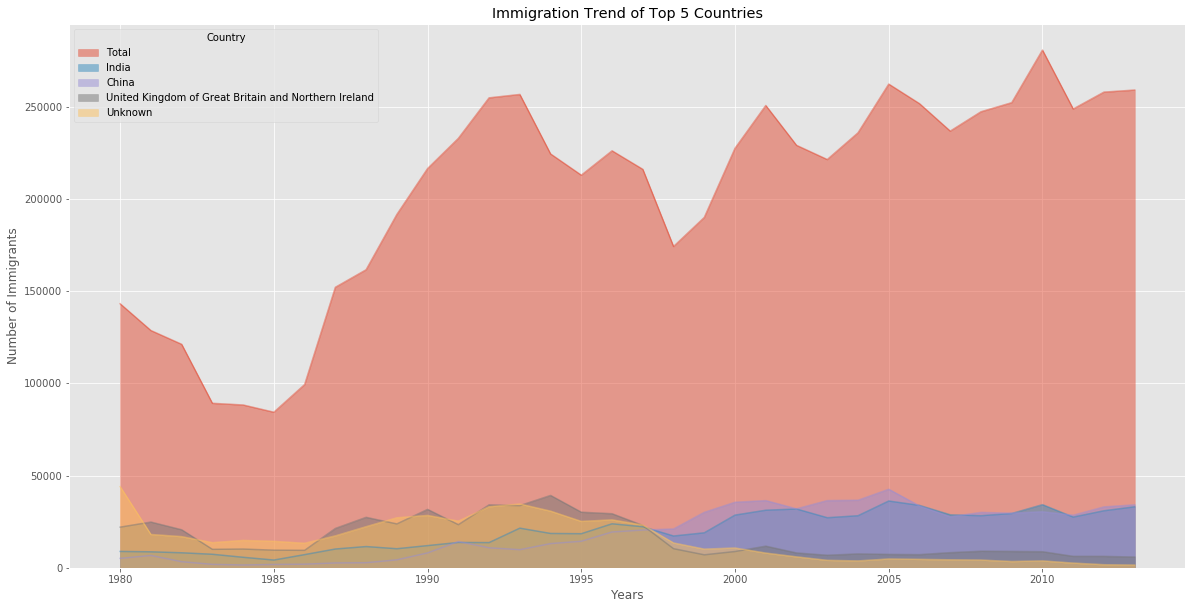

In [15]:
df_top5.index = df_top5.index.map(int) # cambiemos los valores de índice de df_top5 al tipo entero para la diagramación
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pase un tamaño de tupla (x, y)
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

El diagrama no apilado tiene una transparencia predeterminada (valor alfa) de 0,5. Para modificar este valor, podemos pasar el parámetro `alpha`.

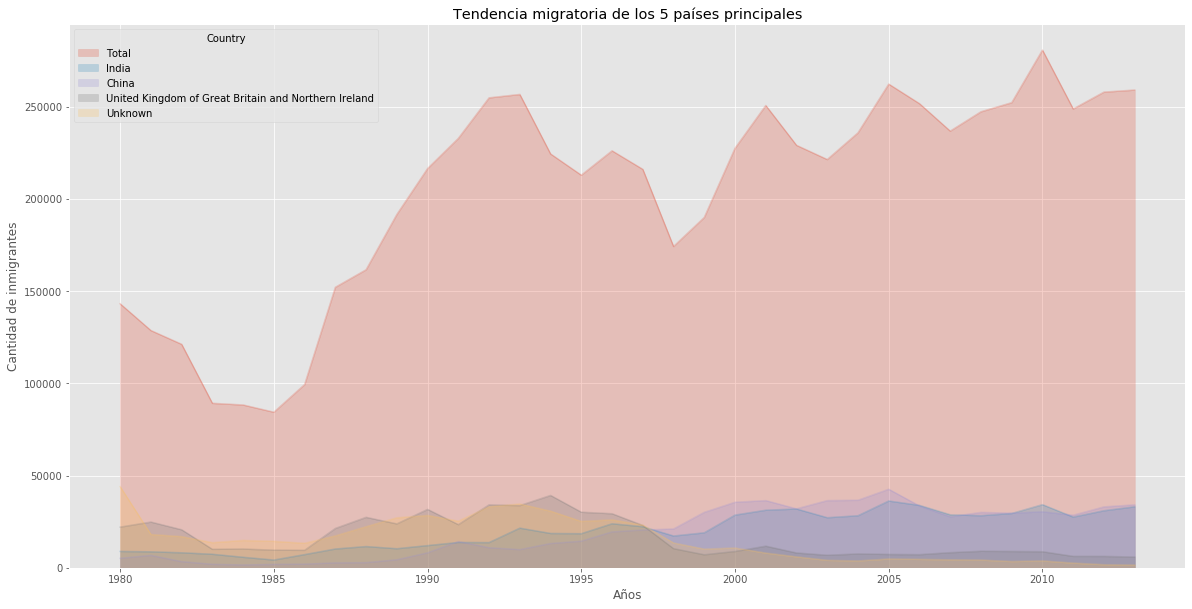

In [16]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Tendencia migratoria de los 5 países principales')
plt.ylabel('Cantidad de inmigrantes')
plt.xlabel('Años')

plt.show()

### Dos tipos de diagramas

Como analizamos en estas lecciones de video, `matplotlib`ofrece dos opciones o estilos de diagramas. Podemos diagramar con la capa Artist (Artista) o con la capa de programación.

**Opción 1: Capa de programación (método de procedimiento), con matplotlib.pyplot como 'plt'**

Para usar `plt` como `matplotlib.pyplot`, y agregar más elementos ejecutando diferentes métodos de manera procesal. Por ejemplo, `plt.title(...)` para agregar un título o `plt.xlabel(...)` para agregar una etiqueta al eje X.
```python
    # Opción 1: Esto es lo que usamos hasta ahora
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

**Opción 2: Capa Artist (método orientado al objeto), utilizando una instancia de Axes de Matplotlib (preferido)**

Puede usar una instancia de `Axes` de su diagrama actual y almacenarla en una variable (por ejemplo `ax`). Puede agregar más elementos ejecutando los métodos con unos pocos cambios en la sintaxis (debe agregar "set_" a los métodos anteriores). Por ejemplo, use `ax.set_title()` en vez de `plt.title()` para agregar un título o `ax.set_xlabel()` en lugar de `plt.xlabel()` para agregar una etiqueta al eje X. 

A veces, esta opción es más transparente y flexible cuando se usa en diagramas avanzados (en especial cuando tenemos varios diagramas, como veremos luego). 

En este curso, usaremos la **capa de programación (scripting layer)**, excepto en el caso de las visualizaciones avanzadas, en las que tendremos que usar la **capa Artist (artist layer)** para manipular aspectos avanzados de los diagramas.

Text(0.5, 0, 'Years')

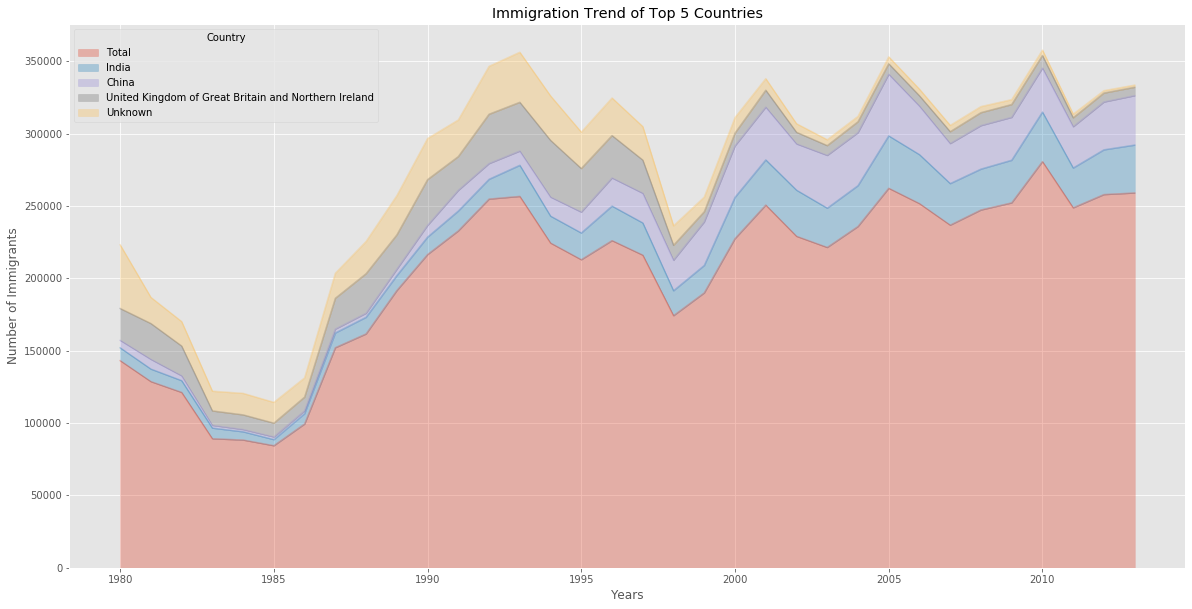

In [17]:
# opción 2: opción preferida con más flexibilidad
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Pregunta**: Use la capa de programación para crear un diagrama de área apilado de los 5 países que aportaron la menor cantidad de inmigrantes a Canadá **desde** 1980 hasta 2013. Use un valor de transparencia de 0,45.

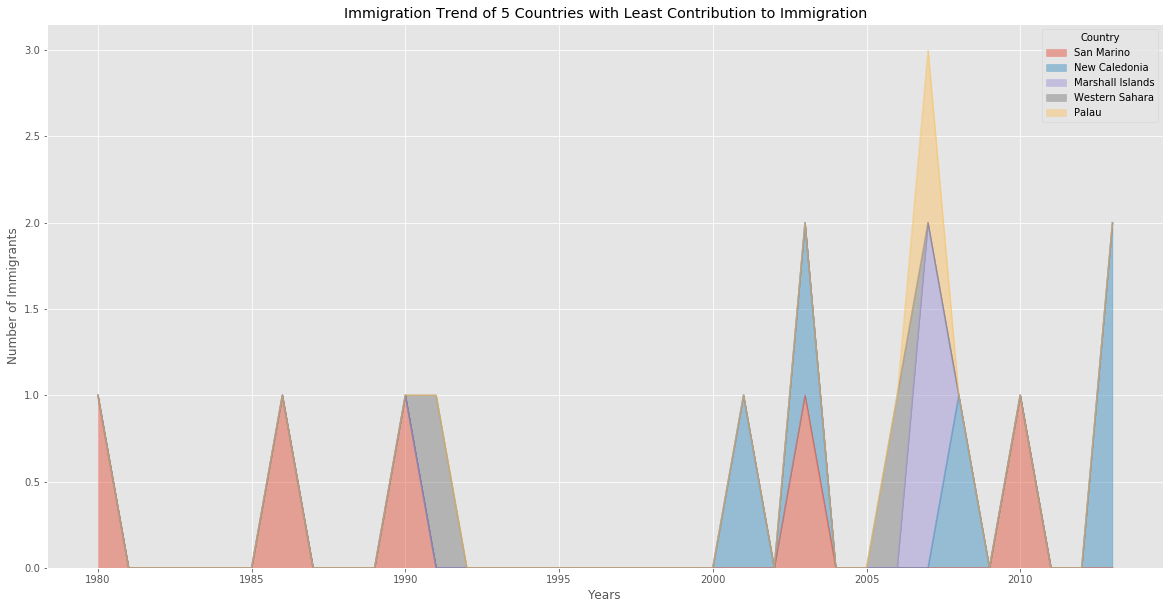

In [18]:
### escriba su respuesta aquí print(df.tail())

# 5 países con menor contribucion
df_Least5 = df_can.tail(5)

# transponga el DataFrame
df_Least5 = df_Least5[years].transpose() 
df_Least5.head()

# Cambiar los valores de indice para tipo de entero para graficar
df_Least5.index = df_Least5.index.map(int) 
df_Least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

# Graficar
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Haga doble clic __aquí__ para ver la solución. 
<!-- La respuesta correcta es:
\\ # obtenga los 5 países con la menor contribución.
df_least5 = df_can.tail(5)
-->

<!--
\\ # transponer el marco de datos (DataFrame)
df_least5 = df_least5[years].transpose() 
df_least5.head()
-->

<!--
df_least5.index = df_least5.index.map(int) # cambiemos los valores de índice de df_least5 para tipo entero para graficar
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 
-->

<!--
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
-->

<!--
plt.show()
-->

**Pregunta**: Use la capa Artist para crear un diagrama de área no apilado de los 5 países que aportaron menor cantidad de inmigrantes a Canadá **desde** 1980 hasta 2013. Use un valor de transparencia de 0,55.

Text(0.5, 0, 'Years')

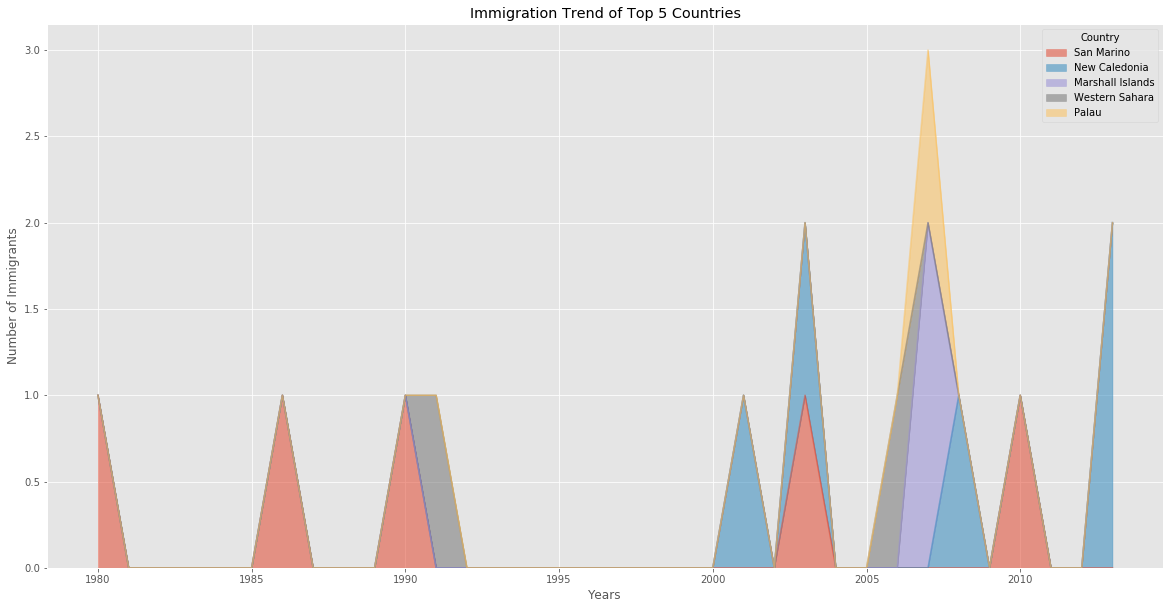

In [19]:
### escriba su respuesta aquí

# opción 2: opción preferida con más flexibilidad
ax = df_Least5.plot(kind='area', alpha=0.55, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')



# Histogramas<a id="8"></a>

Un histograma es una manera de representar la distribución de *frecuencias* de los conjuntos de datos numéricos. Funciona de la siguiente manera: divide el eje X en *intervalos (bins)*, asigna cada punto de datos del conjunto de datos a un intervalo y, luego, cuenta la cantidad de puntos de datos que se asignaron a cada intervalo. De esta manera, el eje Y es la frecuencia o la cantidad de puntos de datos de cada intervalo. Observe que podemos cambiar el tamaño del intervalo y que, por lo general, debemos modificarlo para que la distribución se vea bien.

**Pregunta:** ¿Cuál es la distribución de frecuencias de la cantidad (población) de inmigrantes nuevos de estos países a Canadá en 2013?

Antes de continuar con la creación del histograma, examinemos la división de los datos en intervalos. Para ello, usaremos el método de `histrograma` de **Numpy** a fin de obtener los rangos de los intervalos y los resultados de frecuencia de la siguiente manera:

In [20]:
# examinemos rápidamente los datos de 2013
df_can['2013'].head()

Country
Total                                                   259021
India                                                    33087
China                                                    34129
United Kingdom of Great Britain and Northern Ireland      5827
Unknown                                                   1484
Name: 2013, dtype: int64

In [21]:
# np.histogram arroja 2 valores
count, bin_edges = np.histogram(df_can['2013'])

print(count) # resultado de frecuencia
print(bin_edges) # bin ranges, default = 10 bins

[193   3   0   0   0   0   0   0   0   1]
[     0.   25902.1  51804.2  77706.3 103608.4 129510.5 155412.6 181314.7
 207216.8 233118.9 259021. ]


De manera predeterminada, el método de `histograma` divide el conjunto de datos en 10 intervalos. La figura que aparece a continuación resume los rangos de intervalo y la distribución de frecuencias de la inmigración en 2013. Podemos observar que en 2013: 

* 178 países aportaron entre 0 a 3.412,9 inmigrantes 
* 11 países aportaron entre 3.412,9 a 6.825,8 inmigrantes 
* 1 país aportó entre 6.825,8 a 10.238,7 inmigrantes, y así sucesivamente. 

<img src="https://ibm.box.com/shared/static/g54s9q97mrjok0h4272o7g09cyigei0v.jpg" align="center" width=800>

Podemos diagramar esta distribución fácilmente si pasamos `kind=hist` a `plot()`.

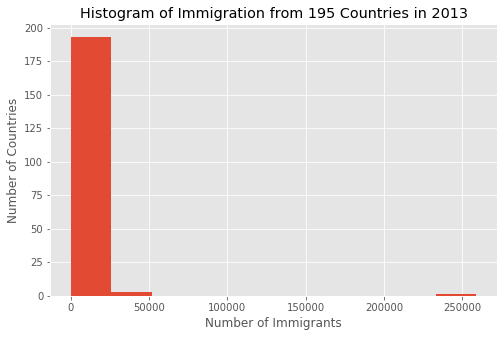

In [22]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # agregue un título al histograma
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

En el diagrama anterior, el eje X representa el rango de población de inmigrantes en intervalos de 3.412,9. El eje Y representa la cantidad de países que contribuyeron a la población mencionada anteriormente. 

Observe que las etiquetas del eje X no coinciden con el tamaño del intervalo. Esto se puede solucionar pasando una palabra clave `xticks` que contenga la lista de los tamaños de intervalos, tal como se observa a continuación:

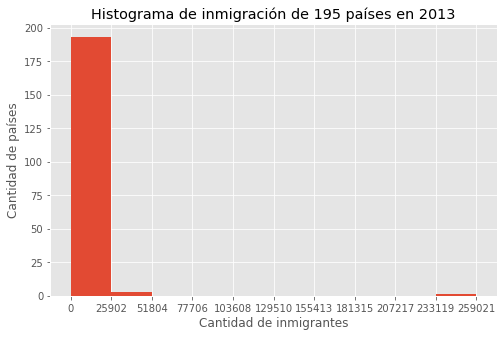

In [23]:
# 'bin_edges' es una lista de intervalos
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histograma de inmigración de 195 países en 2013') # add a title to the histogram
plt.ylabel('Cantidad de países') # agregue una etiqueta Y 
plt.xlabel('Cantidad de inmigrantes') # agregue una etiqueta X

plt.show()

*Nota:* También podemos usar `df_can['2013'].plot.hist()`. De hecho, en toda esta lección, utilizar `some_data.plot(kind='type_plot', ...)` es equivalente a utilizar `some_data.plot.type_plot(...)`. Esto quiere decir que pasar el tipo de diagrama como argumento o método funciona de la misma manera. 

Consulte la documentación de *pandas* para obtener más información:  http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html.

También podemos trazar varios histogramas en el mismo diagrama. Por ejemplo, intentemos responder las siguientes preguntas con un histograma. 

**Pregunta:** ¿Cuál es la distribución de la inmigración de Dinamarca, Noruega y Suecia entre los años 1980 a 2013? 

In [24]:
# examinemos rápidamente el conjunto de datos
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


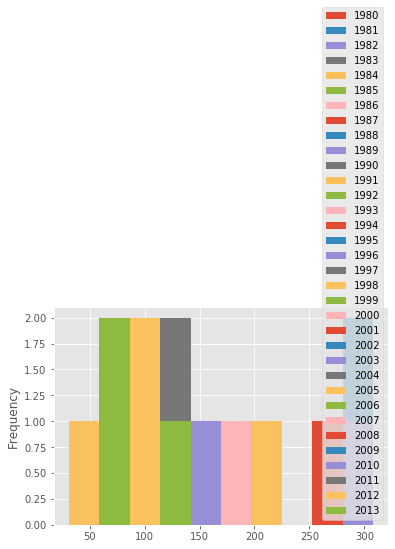

In [25]:
# genere el histograma
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Aparentemente, no es correcto. 

No se preocupe: sucederán situaciones como esta cuando cree diagramas. Por lo general, la solución está en la manera en que está estructurado el conjunto de datos subyacente. 

*pandas* diagramó la distribución de frecuencias de la población para los `years (años)` en lugar de haberlo hecho para los 3 países.

Para solucionar fácilmente este problema, transponga primero el conjunto de datos y, luego, cree el diagrama tal como se muestra a continuación.

In [26]:
# transponga el DataFrame
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


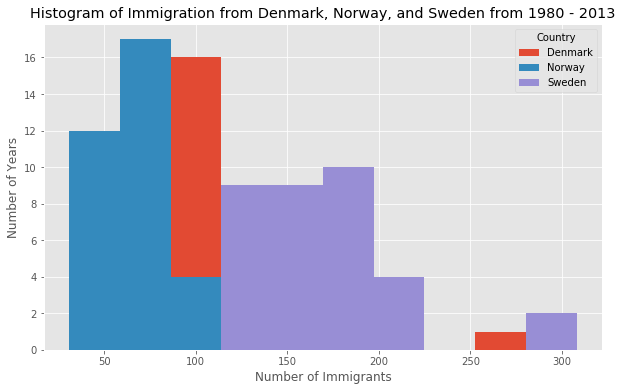

In [27]:
# genere el histograma
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Hagamos algunas modificaciones para mejorar el impacto y la apariencia del diagrama anterior: 
* Pase el parámetro `bins` para aumentar el tamaño de los intervalos a 15. 
* Pase el parámetro  `alpha` para establecer la transparencia en el 60 %. 
* Pase el parámetro `x-label` para etiquetar el eje X. 
* Pase el parámetro `color` para cambiar los colores de los diagramas.

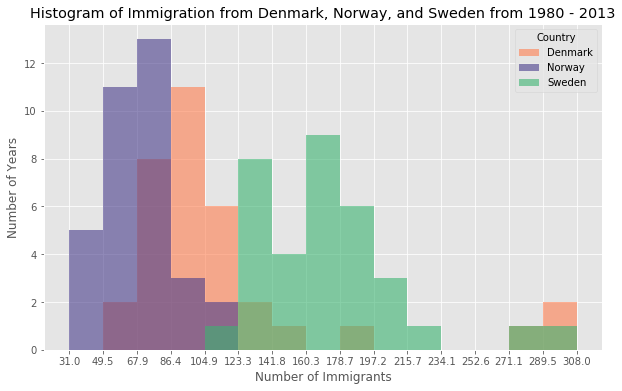

In [28]:
# obtengamos los valores de x-tick
count, bin_edges = np.histogram(df_t, 15)

# histograma no apilado
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Sugerencia: Para obtener la lista completa de los colores disponibles en Matplotlib, ejecute el siguiente código en el shell de Python: 
```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```

Si deseamos que los diagramas no se superpongan, podemos apilarlos con el parámetro `stacked`. También ajustemos las etiquetas mínima y máxima del eje X para eliminar el espacio adicional en los bordes del diagrama. Podemos pasar una tupla (mínima, máxima) con el parámetro  `xlim`, como se muestra a continuación.

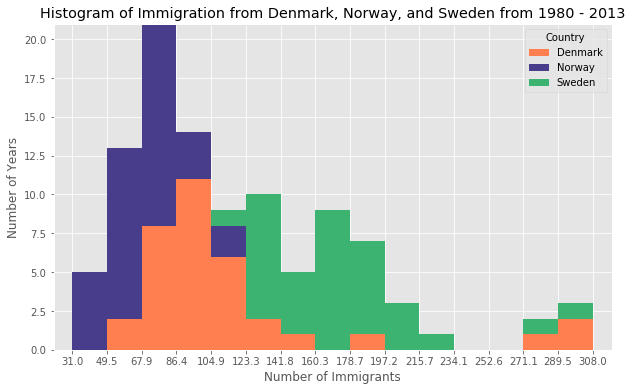

In [29]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  el primer valor de intervalo es 31,0 y se agrega un espacio de 10 para mejorar la apariencia
xmax = bin_edges[-1] + 10  #  el último valor de intervalo es 308,0 y se agrega un espacio de 10 para mejorar la apariencia

# histograma apilado (stacked)
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

**Pregunta:** Utilice la capa de programación para mostrar la distribución de inmigración de Grecia, Albania y Bulgaria entre los años 1980 a 2013. Utilice un diagrama superpuesto con 15 intervalos y un valor de transparencia de 0,35. 

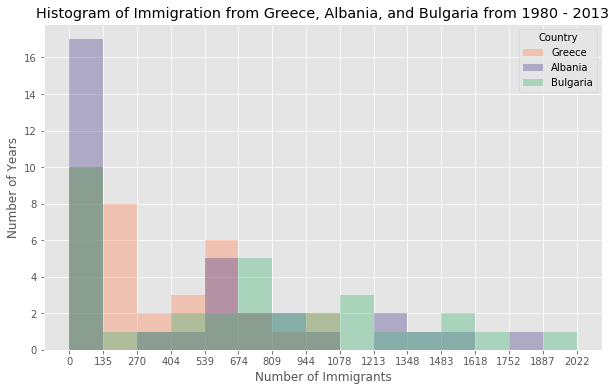

In [30]:
### escriba su respuesta aquí

# marco de datos de los países de interés (cof)
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpóngamos el marco de datos (DataFrame)
df_cof = df_cof.transpose() 

# vamos a obtener los valores de la marca x (x-tick)
count, bin_edges = np.histogram(df_cof, 15)

# Histograma sin apilar (Un-stacked Histogram)
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()




Haga doble clic __aquí__ para ver la solución. 

<!-- La respuesta correcta es:
\\ # creemos un marco de datos de los países de interés (cof)
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
-->

<!--
\\ # transpóngamos el marco de datos (DataFrame)
df_cof = df_cof.transpose() 
-->

<!--
\\ # vamos a obtener los valores de la marca x (x-tick)
count, bin_edges = np.histogram(df_cof, 15)
-->

<!--
\\ # Histograma sin apilar (Un-stacked Histogram)
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )
-->

<!--
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
-->

<!--
plt.show()
-->

# Gráficos de barras (DataFrame) <a id="10"></a>

Un gráfico de barras es una manera de visualizar los datos en la que la *longitud* de las barras representa la magnitud o el tamaño de la característica o variable. Por lo general, los gráficos de barras representan variables numéricas y categóricas agrupadas en intervalos. 

Para crear un gráfico de barras, podemos pasar uno de dos argumentos por medio del parámetro `kind` en `plot()`: 
* kind=bar crea un gráfico de barras *verticales*
* kind=barh crea un gráfico de barras *horizontales*

**Gráfico de barras verticales**

En los gráficos de barras verticales, el eje X se usa para las etiquetas y la longitud de las barras del eje Y corresponde a la magnitud de la variable que se mide. Los gráficos de barras verticales son particularmente útiles para analizar datos en series de tiempo. Una desventaja es que no tienen espacio para las etiquetas de texto al pie de cada barra. 

**Comencemos con el análisis de los efectos de la crisis financiera de Islandia:**

La crisis financiera de Islandia, que tuvo lugar entre 2008 a 2011, fue un evento económico y político de gran importancia en Islandia. En proporción con el tamaño de su economía, el colapso bancario generalizado de Islandia fue el más grande de la historia económica a nivel internacional. La crisis provocó una depresión económica profunda desde 2008 hasta 2011 y una gran inestabilidad política. 

**Pregunta:** Comparemos la cantidad de inmigrantes islandeses (país = 'Islandia') que recibió Canadá desde el año 1980 hasta el año 2013. 

In [31]:
# paso 1: obtenga los datos
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

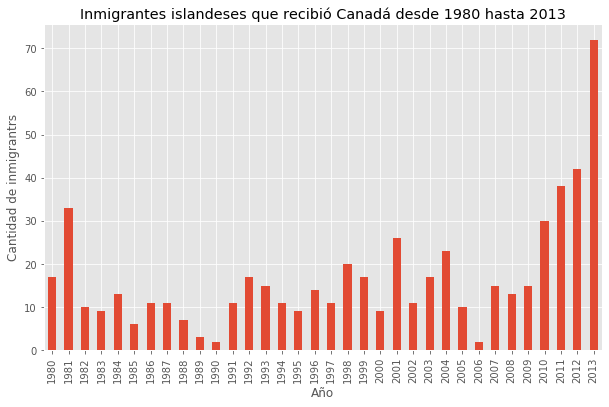

In [32]:
# paso 2: diagrame los datos 
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Año') # agregue una etiqueta X al diagrama
plt.ylabel('Cantidad de inmigrantrs') # agregue una etiqueta Y al diagrama 
plt.title('Inmigrantes islandeses que recibió Canadá desde 1980 hasta 2013') # agregue un título al diagrama

plt.show()

El gráfico de barras anterior muestra la cantidad total de inmigrantes desglosada por año. Se puede ver de manera clara el impacto de la crisis financiera, ya que la cantidad de inmigrantes islandeses que recibió Canadá comenzó a crecer rápidamente después de 2008. 

Anotemos esto en el gráfico con el método `annotate` de la **capa de programación (scripting layer)** o la **interfaz de pyplot (pyplot interface)**. Pasaremos los siguientes parámetros: 
- `s`: str, el texto de la anotación. 
- `xy`: una tupla que identifica el punto (x,y) donde se debe anotar (en este caso, el extremo final de la flecha). 
- `xytext`: una tupla que identifica el punto (x,y) donde se debe colocar el texto (en este caso, el extremo inicial de la flecha). 
- `xycoords`: el sistema de coordenadas en el que se representa xy. El valor 'data' utiliza el sistema de coordenadas del objeto que se anota (predeterminado). 
- `arrowprops`: usa un diccionario de propiedades para dibujar la flecha: 
    - `arrowstyle`: especifica el estilo de la flecha; `->` es una flecha estándar. 
    - `connectionstyle`: especifica el tipo de conexión; `arc3` es una línea recta. 
    - `color`: especifica el color de la flecha. 
    - `lw`: especifica el ancho de la línea. 

Lea la documentación de Matplotlib para obtener más detalles acerca de las anotaciones:
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

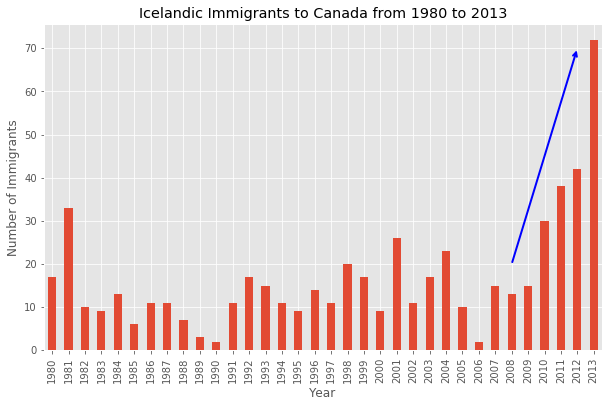

In [33]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rote las barras 90 grados

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. la dejará vacía si no hay texto
             xy=(32, 70),             # coloque la punta de la flecha en el punto (año 2012 , población 70)
             xytext=(28, 20),         # coloque la base de la flecha en el punto (año 2008 , población 20)
             xycoords='data',         # usará el sistema de coordenadas del objeto que se anota
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Anotemos también un texto que se vea sobre la flecha. Pasaremos los siguientes parámetros adicionales: 
- `rotation`: ángulo de rotación del texto en grados (en sentido contrario a las agujas del reloj) 
- `va`: alineación vertical del texto ['centro (center)' | 'arriba (top)' | 'abajo (down)' | 'base (baseline)'] 
- `ha`: alineación horizontal del texto ['centro (center)' | 'derecha (right)' | 'izquierda (left)']

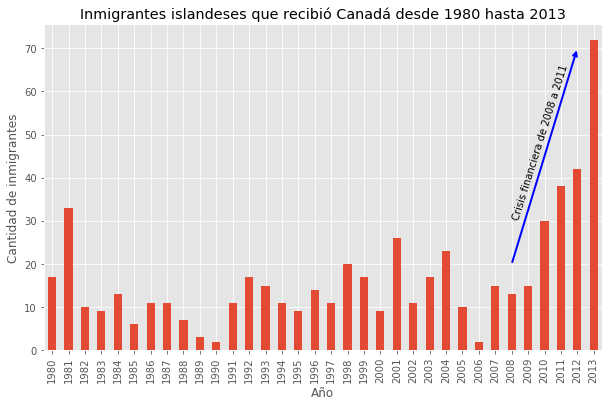

In [34]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Año')
plt.ylabel('Cantidad de inmigrantes')
plt.title('Inmigrantes islandeses que recibió Canadá desde 1980 hasta 2013')

# Annotate arrow
plt.annotate('',                      # s: str. la dejará vacía si no hay texto
             xy=(32, 70),             # coloque la punta de la flecha en el punto (año 2012 , población 70)
             xytext=(28, 20),         # coloque la base de la flecha en el punto (año 2008 , población 20)
             xycoords='data',         # usará el sistema de coordenadas del objeto que se anota
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Crisis financiera de 2008 a 2011', # texto que desea mostrar
             xy=(28, 30),                    # comience el texto en el punto (año 2008, población 30)
             rotation=72.5,                  # según prueba y error para hacer coincidir la flecha
             va='bottom',                    # si desea que el texto esté alineado 'abajo' de manera vertical
             ha='left',                      # si desea que el texto esté alineado a la 'izquierda' de manera horizontal
            )

plt.show()

**Gráficos de barras horizontales **

En ocasiones, es más práctico representar los datos de manera horizontal, especialmente si necesita más espacio para las etiquetas de las barras. En los gráficos de barras horizontales, el eje Y se usa para las etiquetas y la longitud de las barras del eje X corresponde a la magnitud de la variable que se mide. Como verá, hay más espacio en el eje Y para etiquetar las variables categóricas. 

**Pregunta:** Con la capa de programación y el conjunto de datos `df_can`, cree un gráfico de barras *horizontales* que muestre la cantidad *total* de inmigrantes que recibió Canadá de los 15 países principales durante los años 1980 y 2013. Etiquete cada país con la cantidad total de inmigrantes.

Paso 1: Obtenga los datos de los 15 países principales.

In [37]:
### escriba su respuesta aquí

# ordenemos el marco de datos (DataFrame) en la columna 'Total' (descendente)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# obténgamos los 15 mejores países
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Jamaica                                                  106431
France                                                   109091
Lebanon                                                  115359
Poland                                                   139241
Republic of Korea                                        142581
Sri Lanka                                                148358
Iran (Islamic Republic of)                               175923
United States of America                                 241122
Pakistan                                                 241600
Philippines                                              511391
Unknown                                                  515059
United Kingdom of Great Britain and Northern Ireland     551500
China                                                    659962
India                                                    691904
Total                                                   6924212
Name: Total, dtype: int64

Haga doble clic __aquí__ para ver la solución. 
<!-- La respuesta correcta es:
\\ # ordenemos el marco de datos (DataFrame) en la columna 'Total' (descendente)
df_can.sort_values(by='Total', ascending=True, inplace=True)
-->

<!--
\\ # obténgamos los 15 mejores países
df_top15 = df_can['Total'].tail(15)
df_top15
-->

Paso 2: Diagrame los datos: 
1. Utilice `kind='barh'` para generar un gráfico de barras con barras horizontales. 
2. Asegúrese de elegir un tamaño adecuado para el gráfico, etiquete los ejes y colóquele un título al gráfico. 
3. Compare los países y anote la población de inmigrantes con la función de anotación (`anotate`) de la interfaz de programación.

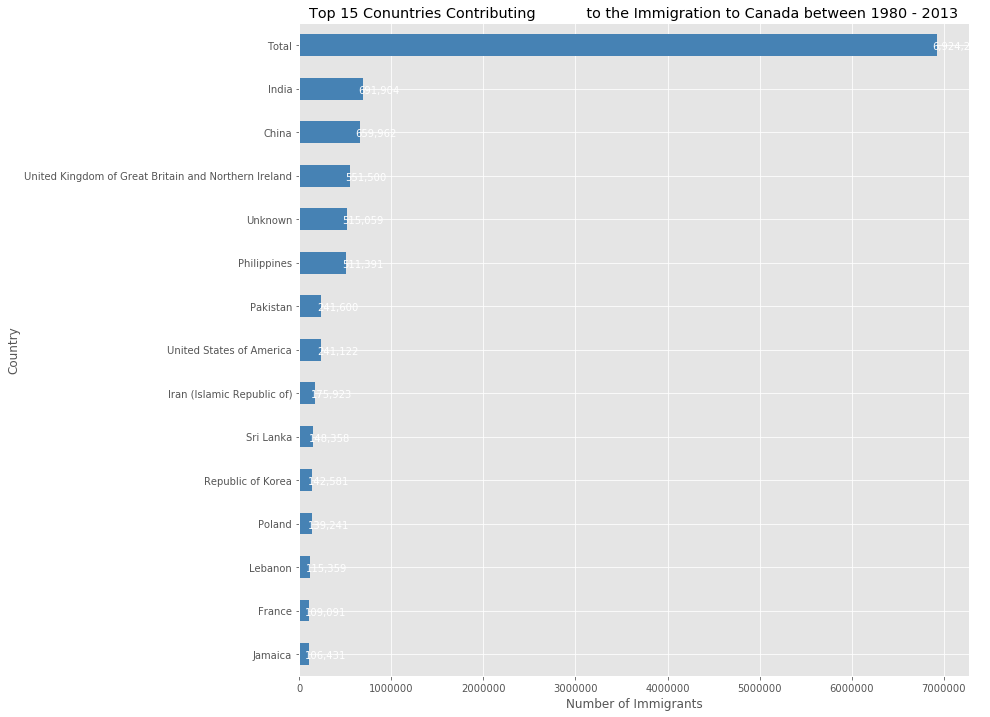

In [36]:
### escriba su respuesta aquí

# genere la trama
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing \
          to the Immigration to Canada between 1980 - 2013')

# anote las etiquetas de valor a cada país
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # coloque el texto al final de la barra (restando 47000 de x, y 0.1 de y para hacer que quepa dentro de la barra)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()



Double-click __here__ for the solution.
<!-- La respuesta correcta es:
\\ # genere la trama
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
-->

<!--
\\ # anote las etiquetas de valor a cada país
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # coloque el texto al final de la barra (restando 47000 de x, y 0.1 de y para hacer que quepa dentro de la barra)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
-->

<!--
plt.show()
-->

### ¡Gracias por completar esta actividad de laboratorio! 

Esta libreta fue creada originalmente por [Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan) con aportes de [Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani) y [Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic).

Recientemente, esta libreta fue modificada por [Alex Aklson](https://www.linkedin.com/in/aklson/). Espero que esta sesión de laboratorio le haya resultado interesante. Si tiene alguna pregunta, comuníquese conmigo. 

Esta libreta forma parte del curso gratuito de **Cognitive Class** denominado *Visualización de datos con Python*. Si accedió a esta libreya desde fuera del curso, puede llevar a cabo el curso en línea auto-instructivo haciendo clic [aquí](https://cocl.us/DV0101EN_Lab2).

Derechos de autor &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). Esta cuaderno y su código fuente se publican bajo los términos de la [Licencia de MIT](https://bigdatauniversity.com/mit-license/).